In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from collections import defaultdict

### 1. Creating Bigrams from the data

The bigram model: given a letter, predict the next letter

In [7]:
# reading the names
with open("names.txt", "r") as f:
    names = f.readlines()
names = [name.strip() for name in names]

In [9]:
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [54]:
# creating bigrams counts
N = defaultdict(int)
for name in names:
    chrs = ['.'] + list(name) + ['.']
    for c1, c2 in zip(chrs[:-1], chrs[1:]):
        N[f'{c1}{c2}'] += 1

# smoothing out counts
for key in N:
    N[key] += 1

# sort by counts
# sorted(N.items(), key = lambda x: -x[1])

In [76]:
# making probability tensor
chrs = ['.'] + list('abcdefghijklmnopqrstuvwxyz') # len(chrs) = 27
T = torch.empty((27, 27), dtype=int)
for idx1, c1 in enumerate(chrs):
    for idx2, c2 in enumerate(chrs):
        T[idx1, idx2] = N[f'{c1}{c2}']

# normalizing tensor to get proba
P = T / T.sum(dim=1, keepdim=True)

In [82]:
P.sum(1) # sanity check

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

#### 1.1. Visualizing Bigrams

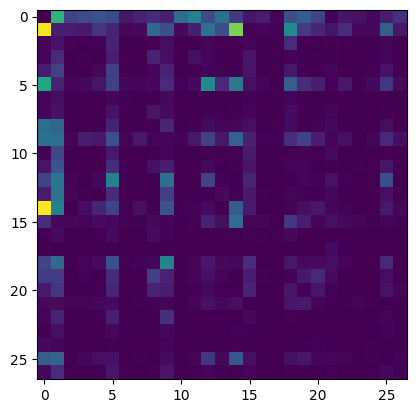

In [88]:
plt.imshow(T)

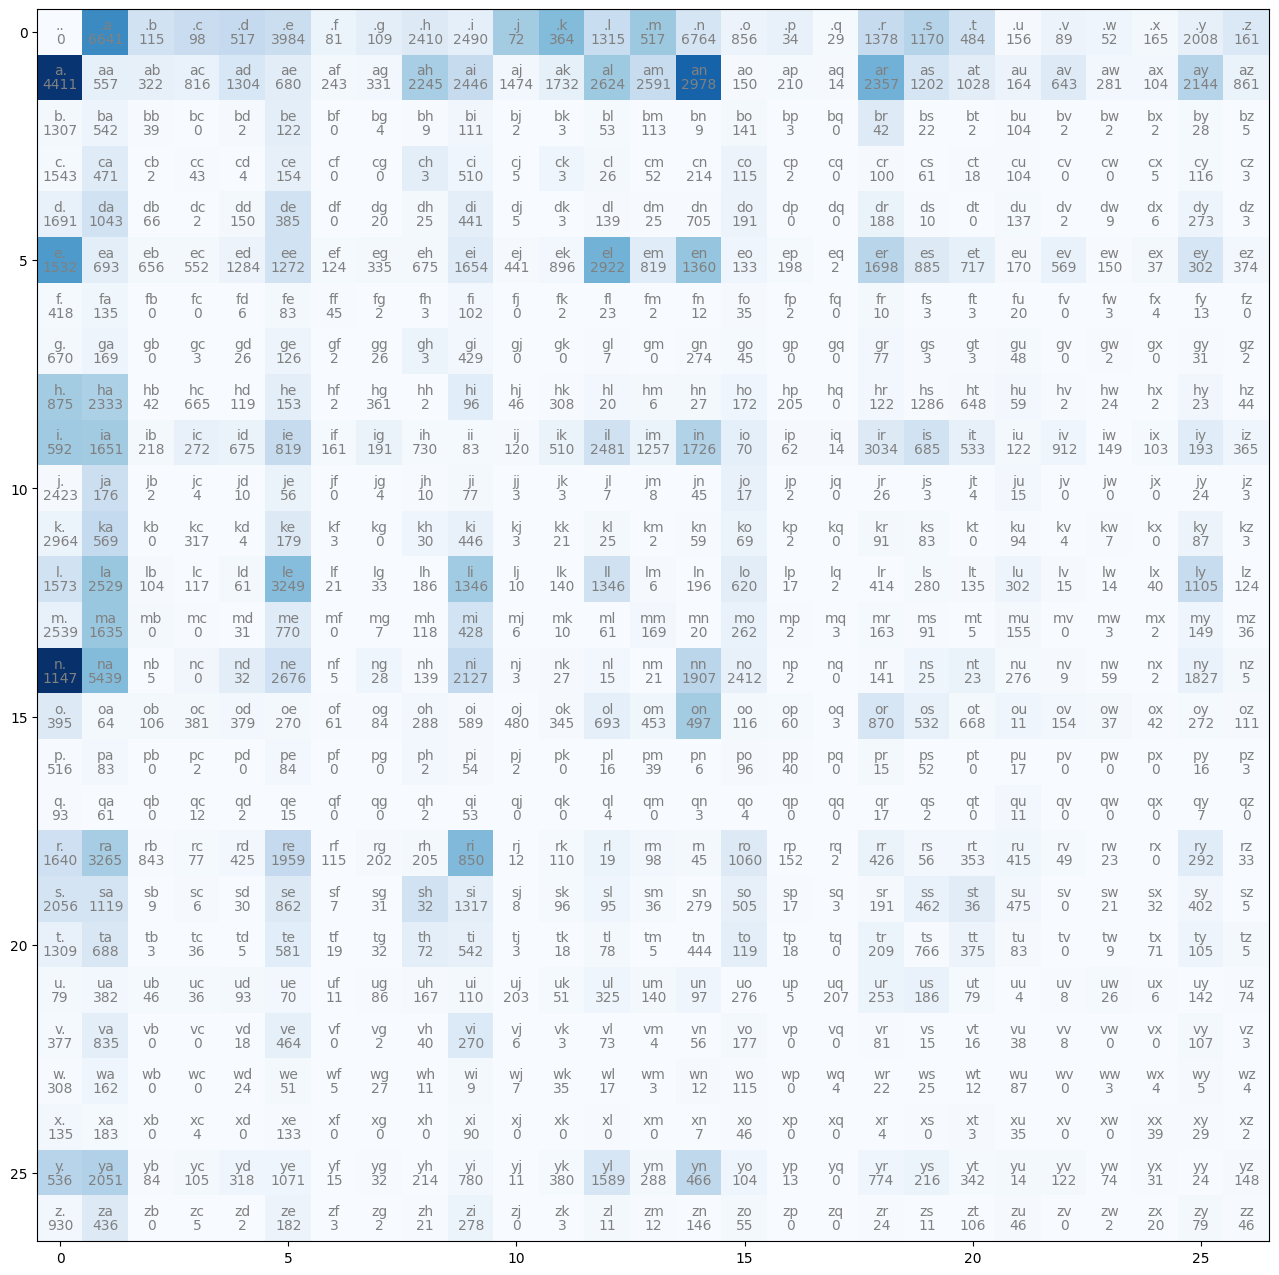

In [97]:
plt.figure(figsize=(16,16))
plt.imshow(T, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = f'{chrs[i]}{chrs[j]}'
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, T[j, i].item(), ha='center', va='top', color='gray')

### 2. Sampling from the model

How we sample from the model? Using a multinomial function

1. We generate x elements following probability distribution P
2. The next letter will be the most popular element 

In [166]:
g = torch.Generator()

def generate_name(P: torch.tensor) -> str:
    """
    Generates a name based on the input tensor P. 
    
    Args:
    P (torch.Tensor): A 2D tensor of size (27, 27) representing transition probabilities.

    Returns:
    str: A generated name.
    """
    generated_name = []
    idx = 0
    
    while True:   
        t = torch.multinomial(P[idx], num_samples=5, replacement=True, generator=g)
        next_idx = torch.bincount(t).argmax().item()
        next_char = chrs[next_idx]
        generated_name.append(next_char)
        # print(next_idx, next_char)
        
        if next_idx == 0:
            break
        idx = next_idx

    return ''.join(generated_name)

generated_names = []
for _ in range(100):
    generated_name = generate_name(P)
    generated_names.append(generated_name)

# filter out name with less than 
filtered_names = 

In [167]:
generated_names

['br.',
 'a.',
 'bre.',
 'a.',
 'a.',
 's.',
 'k.',
 'a.',
 'achara.',
 'a.',
 'al.',
 'da.',
 'a.',
 'ah.',
 'bre.',
 'geay.',
 'e.',
 'd.',
 'ayn.',
 'ja.',
 'a.',
 'caiae.',
 'e.',
 'cebafa.',
 'a.',
 'kacaeriee.',
 'dee.',
 'il.',
 'a.',
 'ahiandada.',
 'ka.',
 'ar.',
 'a.',
 'kaga.',
 'ae.',
 'drenan.',
 'an.',
 'caa.',
 'ala.',
 'ariae.',
 'y.',
 'erona.',
 'l.',
 'f.',
 'akaa.',
 'br.',
 'r.',
 'a.',
 'a.',
 'ka.',
 'cka.',
 'a.',
 'rriti.',
 'a.',
 'e.',
 'brie.',
 'ma.',
 'lana.',
 'jon.',
 'aeri.',
 'aneelaraana.',
 'alana.',
 'e.',
 'coda.',
 'a.',
 'ja.',
 'ca.',
 'an.',
 'a.',
 'a.',
 'den.',
 'ben.',
 'ga.',
 'fa.',
 'i.',
 'a.',
 'ke.',
 'keli.',
 'aily.',
 'ba.',
 'miselela.',
 'ja.',
 'be.',
 'a.',
 'ani.',
 'ka.',
 'sah.',
 'bea.',
 'eli.',
 'em.',
 'ahakiada.',
 'a.',
 'da.',
 'b.',
 'a.',
 'k.',
 'a.',
 'ceiamaha.',
 'a.',
 'malen.']

In [135]:
t = torch.multinomial(P[1], num_samples=27, replacement=True, generator=g)
print(P[1])
print(t)

tensor([0.1958, 0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688,
        0.0487, 0.0052, 0.0168, 0.0746, 0.0482, 0.1604, 0.0019, 0.0024, 0.0018,
        0.0963, 0.0330, 0.0203, 0.0113, 0.0246, 0.0048, 0.0054, 0.0605, 0.0129])
tensor([ 0, 14, 19, 19, 15,  9,  8, 19, 22, 22,  4, 26, 14, 14, 12, 13, 18, 18,
        12, 14, 13, 14, 25, 23,  4, 18, 12])


14